**Обучение модели линейной регрессии**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
frame = pd.read_csv('house_sales.csv', delimiter = ',')
frame

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22682,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
22683,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
22684,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
22685,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False


In [18]:
#удаление столбцов, которые не влияют на цену домов
frame = frame.drop(columns=['DocumentDate', 'ym', 'PropertyID', 'ZipCode', 'YrRenovated'])
frame

,SalePrice,PropertyType,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,TrafficNoise,LandVal,ImpsVal,NewConstruction
0,280000,Multiplex,405100,0.930836,300805.0,2,9373,2400,0,3.00,6,7,1991,0,70000,229000,False
1,1000000,Single Family,404400,0.929228,1076162.0,1,20156,3764,1452,3.75,4,10,2005,0,203000,590000,True
2,745000,Single Family,425600,0.977941,761805.0,1,26036,2060,900,1.75,4,8,1947,0,183000,275000,False
3,425000,Single Family,418400,0.961397,442065.0,1,8618,3200,1640,3.75,5,7,1966,0,104000,229000,False
4,240000,Single Family,351600,0.807904,297065.0,1,8620,1720,0,1.75,4,7,1948,0,104000,205000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22682,325000,Single Family,318700,0.732307,443803.0,1,5468,1480,590,1.75,3,7,1951,0,201000,172000,False
22683,1580000,Single Family,433500,0.996094,1586196.0,1,23914,4720,910,4.50,4,11,2000,1,703000,951000,False
22684,165000,Single Family,325300,0.747472,220744.0,1,11170,1070,0,1.00,4,6,1971,0,92000,130000,False
22685,315000,Single Family,400600,0.920496,342207.0,1,6223,1345,0,2.00,3,7,1939,0,103000,212000,False


In [19]:
frame = frame.dropna()
frame.describe()

,SalePrice,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,TrafficNoise,LandVal,ImpsVal
count,2.268700e+04,22687.000000,22687.000000,2.268700e+04,22687.000000,2.268700e+04,22687.000000,22687.000000,22687.000000,22687.000000,22687.000000,22687.000000,22687.000000,2.268700e+04,2.268700e+04
mean,5.079244e+05,392181.923569,0.901153,5.652333e+05,1.018821,1.174633e+04,2080.165734,293.233305,2.176500,3.367744,7.680963,1971.195266,0.205801,2.203211e+05,3.004712e+05
std,3.466368e+05,36349.866645,0.083525,3.854029e+05,0.159752,2.901602e+04,913.742170,439.454608,0.768027,0.904379,1.180464,30.313796,0.554216,1.829177e+05,2.265750e+05
min,3.000000e+03,311600.000000,0.715993,3.368000e+03,1.000000,4.940000e+02,370.000000,0.000000,0.000000,0.000000,3.000000,1900.000000,0.000000,0.000000e+00,0.000000e+00
25%,3.250000e+05,360700.000000,0.828814,3.605630e+05,1.000000,4.800000e+03,1420.000000,0.000000,1.750000,3.000000,7.000000,1950.000000,0.000000,1.070000e+05,1.720000e+05
50%,4.246500e+05,403200.000000,0.926471,4.713150e+05,1.000000,7.200000e+03,1910.000000,0.000000,2.250000,3.000000,7.000000,1977.000000,0.000000,1.820000e+05,2.460000e+05
75%,5.850000e+05,421200.000000,0.967831,6.494110e+05,1.000000,9.794000e+03,2540.000000,580.000000,2.500000,4.000000,8.000000,2000.000000,0.000000,2.670000e+05,3.610000e+05
max,1.100000e+07,435200.000000,1.000000,1.164486e+07,5.000000,1.024068e+06,10740.000000,3500.000000,8.000000,33.000000,13.000000,2015.000000,3.000000,5.538000e+06,5.772000e+06


In [20]:
frame.columns.tolist()

['SalePrice',
 'PropertyType',
 'zhvi_px',
 'zhvi_idx',
 'AdjSalePrice',
 'NbrLivingUnits',
 'SqFtLot',
 'SqFtTotLiving',
 'SqFtFinBasement',
 'Bathrooms',
 'Bedrooms',
 'BldgGrade',
 'YrBuilt',
 'TrafficNoise',
 'LandVal',
 'ImpsVal',
 'NewConstruction']

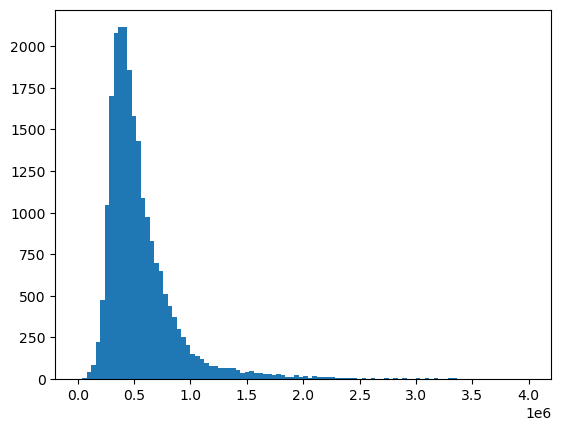

In [21]:
plt.hist(frame['AdjSalePrice'], bins=100, range=(0, 4000000));

{'whiskers': [<matplotlib.lines.Line2D at 0x26649822790>,
 'caps': [<matplotlib.lines.Line2D at 0x26649822cd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x266498223a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2664982f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2664982f4f0>],
 'means': []}

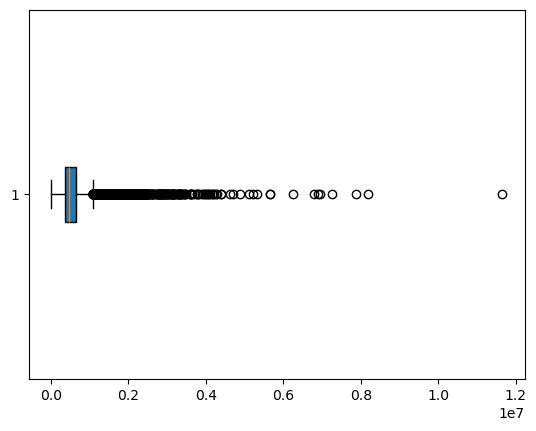

In [22]:
plt.boxplot(frame['AdjSalePrice'], vert=False, patch_artist=True)

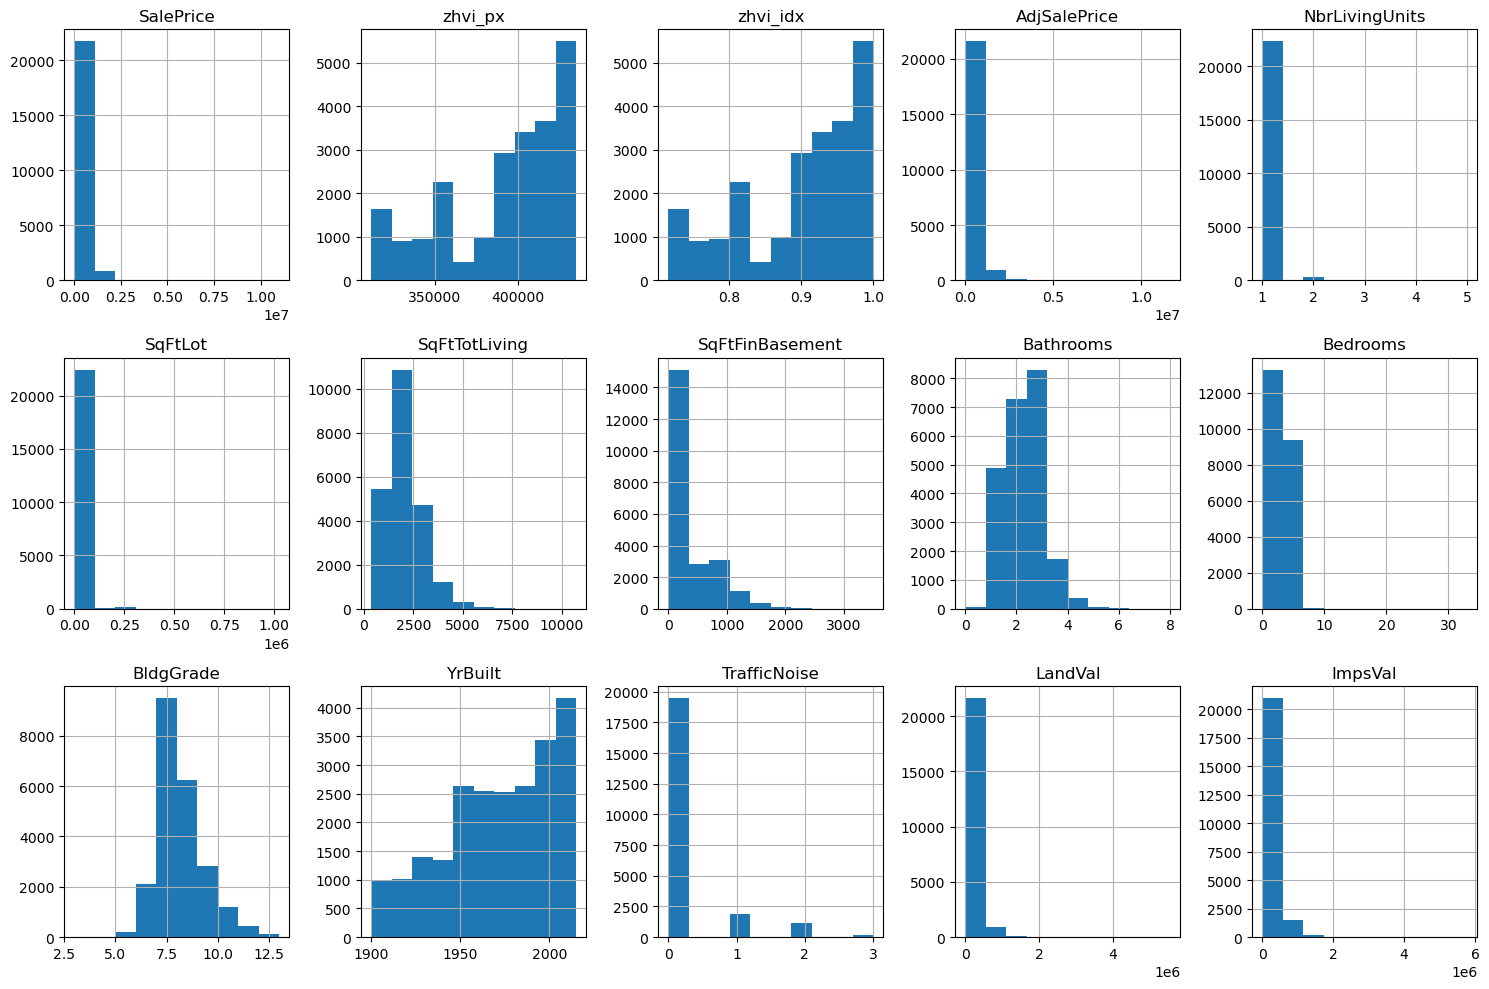

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
frame.hist(ax=axes, column=['SalePrice',
 'PropertyType',
 'zhvi_px',
 'zhvi_idx',
 'AdjSalePrice',
 'NbrLivingUnits',
 'SqFtLot',
 'SqFtTotLiving',
 'SqFtFinBasement',
 'Bathrooms',
 'Bedrooms',
 'BldgGrade',
 'YrBuilt',
 'TrafficNoise', 'LandVal',
 'ImpsVal',
 'NewConstruction'])
plt.tight_layout()
plt.show()

In [24]:
cat_columns = ['PropertyType', 'NewConstruction']

# очистка данных от экстримальных и нереалистичных значений
frame = frame[(frame['NbrLivingUnits'] > 0) & (frame['NbrLivingUnits'] < 3)]  # удаление слишком больших значений жилых единиц
frame = frame[(frame['AdjSalePrice'] < 1500000) & (frame['AdjSalePrice'] > 3000)]  # удаление слишком больших и маленьких цен с учетом инфляции
frame =frame[(frame['SqFtLot'] > 500) & (frame['SqFtLot'] < 50000)]  # удаление слишком больших и маленьких размеров участка
frame = frame[(frame['SqFtTotLiving'] > 360) & (frame['SqFtTotLiving'] < 5100)]  # удаление слишком больших и маленьких жилых площадей
frame = frame[(frame['SalePrice'] > 3000) & (frame['SalePrice'] < 1500000)]  # удаление слишком больших и маленьких цен
#frame = frame[(frame['zhvi_px'] > 310000) & (frame['zhvi_px'] < 440000)]  # удаление больших и маленьких индексов стоимости жилья
frame = frame[frame['SqFtFinBasement'] < 1300] #площидь подвала
#frame = frame[(frame['zhvi_idx'] > 0.7) & (frame['zhvi_idx'] < 1.1)] #индекс стоимости жилья
frame = frame[(frame['YrBuilt'] > 1899) & (frame['YrBuilt'] < 2025)] #год постройки
frame = frame[(frame['LandVal'] >= 0) & (frame['LandVal'] < 850000)] #стоимость земельного участка
frame = frame[(frame['ImpsVal'] >= 0) & (frame['ImpsVal'] < 900000)] #стоимость сооружений
frame = frame[(frame['Bathrooms'] > 0) & (frame['Bathrooms'] < 5)] #ванные
frame = frame[(frame['Bedrooms'] > 0) & (frame['Bedrooms'] < 7)] #спальни
frame = frame[(frame['BldgGrade'] > 5) & (frame['BldgGrade'] < 12)] #качество здания
# сброс индексов
frame = frame.reset_index(drop=True)
frame

,SalePrice,PropertyType,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,TrafficNoise,LandVal,ImpsVal,NewConstruction
0,280000,Multiplex,405100,0.930836,300805.0,2,9373,2400,0,3.00,6,7,1991,0,70000,229000,False
1,745000,Single Family,425600,0.977941,761805.0,1,26036,2060,900,1.75,4,8,1947,0,183000,275000,False
2,240000,Single Family,351600,0.807904,297065.0,1,8620,1720,0,1.75,4,7,1948,0,104000,205000,False
3,349900,Townhouse,369800,0.849724,411781.0,1,1012,930,0,1.50,2,8,2008,0,170000,207000,True
4,327500,Single Family,374300,0.860064,380785.0,1,34465,1750,0,1.50,3,8,1961,0,165000,227000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20572,167500,Single Family,315200,0.724265,231269.0,1,4134,650,0,1.00,2,6,1942,0,194000,45000,False
20573,325000,Single Family,318700,0.732307,443803.0,1,5468,1480,590,1.75,3,7,1951,0,201000,172000,False
20574,165000,Single Family,325300,0.747472,220744.0,1,11170,1070,0,1.00,4,6,1971,0,92000,130000,False
20575,315000,Single Family,400600,0.920496,342207.0,1,6223,1345,0,2.00,3,7,1939,0,103000,212000,False


In [25]:
frame.describe()

,SalePrice,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,TrafficNoise,LandVal,ImpsVal
count,2.057700e+04,20577.000000,20577.000000,2.057700e+04,20577.000000,20577.000000,20577.000000,20577.000000,20577.000000,20577.000000,20577.000000,20577.000000,20577.000000,20577.000000,20577.000000
mean,4.573076e+05,392187.408271,0.901166,5.085445e+05,1.010935,8141.551004,1953.780532,246.302182,2.106818,3.308354,7.578607,1971.151383,0.201147,197108.392866,271377.589736
std,1.979095e+05,36288.496979,0.083383,2.176537e+05,0.103998,6729.732329,731.653828,365.668057,0.686871,0.814684,1.015124,30.440362,0.547530,118541.505128,143413.307471
min,1.048000e+04,311600.000000,0.715993,1.163200e+04,1.000000,572.000000,430.000000,0.000000,0.500000,1.000000,6.000000,1900.000000,0.000000,0.000000,0.000000
25%,3.200000e+05,360700.000000,0.828814,3.550800e+05,1.000000,4600.000000,1400.000000,0.000000,1.750000,3.000000,7.000000,1950.000000,0.000000,104000.000000,169000.000000
50%,4.100000e+05,403200.000000,0.926471,4.572870e+05,1.000000,6960.000000,1850.000000,0.000000,2.250000,3.000000,7.000000,1977.000000,0.000000,175000.000000,238000.000000
75%,5.500000e+05,421200.000000,0.967831,6.104570e+05,1.000000,9262.000000,2400.000000,500.000000,2.500000,4.000000,8.000000,2000.000000,0.000000,253000.000000,339000.000000
max,1.465000e+06,435200.000000,1.000000,1.499191e+06,2.000000,49968.000000,5040.000000,1290.000000,4.750000,6.000000,11.000000,2015.000000,3.000000,845000.000000,899000.000000


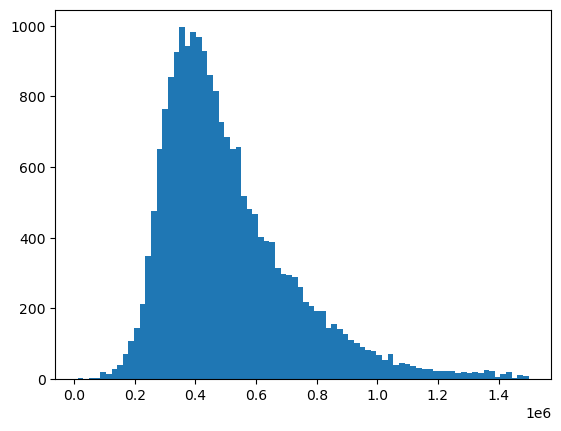

In [26]:
plt.hist(frame['AdjSalePrice'], bins=80);

{'whiskers': [<matplotlib.lines.Line2D at 0x2664a55ba00>,
 'caps': [<matplotlib.lines.Line2D at 0x2664a55bf40>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2664a55b610>],
 'medians': [<matplotlib.lines.Line2D at 0x2664a56b4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2664a56b760>],
 'means': []}

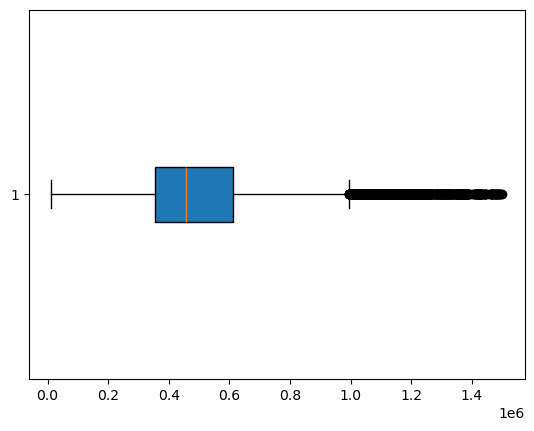

In [27]:
plt.boxplot(frame['AdjSalePrice'], vert=False, patch_artist=True)

In [30]:
# Предварительная обработка категориальных данных (переводим в числа)
# Порядковое кодирование. Обучение, трансформация и упаковка в frame

ordinal = OrdinalEncoder()
ordinal.fit(frame[cat_columns]);
Ordinal_encoded = ordinal.transform(frame[cat_columns])
frame_ordinal = pd.DataFrame(Ordinal_encoded, columns=cat_columns)
frame[cat_columns] = frame_ordinal[cat_columns]
frame

,SalePrice,PropertyType,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,TrafficNoise,LandVal,ImpsVal,NewConstruction
0,280000,0.0,405100,0.930836,300805.0,2,9373,2400,0,3.00,6,7,1991,0,70000,229000,0.0
1,745000,1.0,425600,0.977941,761805.0,1,26036,2060,900,1.75,4,8,1947,0,183000,275000,0.0
2,240000,1.0,351600,0.807904,297065.0,1,8620,1720,0,1.75,4,7,1948,0,104000,205000,0.0
3,349900,2.0,369800,0.849724,411781.0,1,1012,930,0,1.50,2,8,2008,0,170000,207000,1.0
4,327500,1.0,374300,0.860064,380785.0,1,34465,1750,0,1.50,3,8,1961,0,165000,227000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20572,167500,1.0,315200,0.724265,231269.0,1,4134,650,0,1.00,2,6,1942,0,194000,45000,0.0
20573,325000,1.0,318700,0.732307,443803.0,1,5468,1480,590,1.75,3,7,1951,0,201000,172000,0.0
20574,165000,1.0,325300,0.747472,220744.0,1,11170,1070,0,1.00,4,6,1971,0,92000,130000,0.0
20575,315000,1.0,400600,0.920496,342207.0,1,6223,1345,0,2.00,3,7,1939,0,103000,212000,0.0


In [31]:
#х - данные для предсказания, у - будем предсказывать (цена на дом с учетом инфляции)
x,y = frame.drop(columns = ['AdjSalePrice']), frame['AdjSalePrice']

In [35]:
# разбиваем на тестовую и валидационную выборки
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                  test_size=0.3,
                                                  random_state=42)

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)
r = model.score(x_train, y_train)
print('R^2 = ', r) # Метрика R^2

R^2 =  0.9906112635905491


Оценим ошибку модели

In [40]:
from sklearn import metrics

In [41]:
y_pred = model.predict(x_val)

print("Средняя ошибка прогноза модели =", np.sqrt(mean_squared_error(y_val, y_pred)))

Средняя ошибка прогноза модели = 20821.359979639707


In [42]:
# абсолютная ошибка

print("Абсолютная ошибка прогноза модели =",metrics.mean_absolute_error(y_val, y_pred))

Абсолютная ошибка прогноза модели = 13269.41998013035


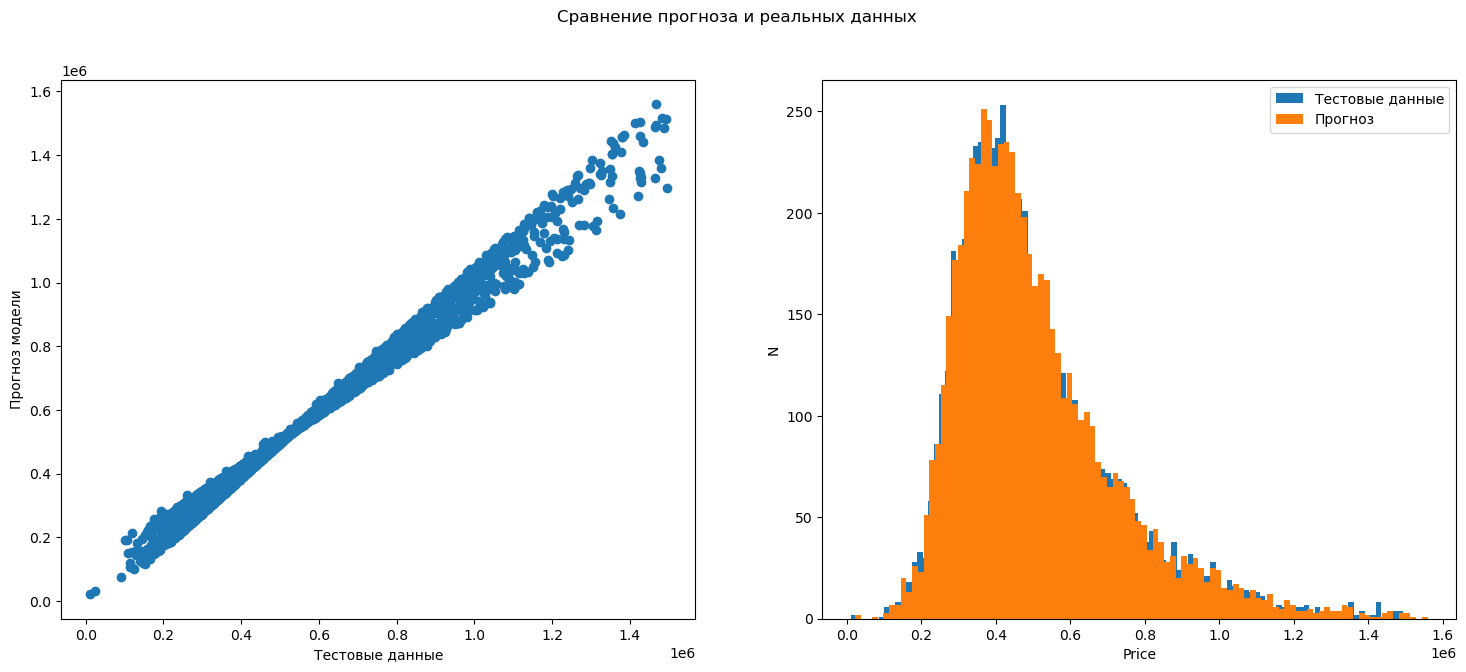

In [43]:
fig,ax = plt.subplots(1,2, dpi = 100, figsize=(18,7))
fig.suptitle('Сравнение прогноза и реальных данных')
ax[0].scatter(y_val, y_pred)
ax[0].set_xlabel('Тестовые данные')
ax[0].set_ylabel('Прогноз модели')

ax[1].hist(y_val,100, label="Тестовые данные")
ax[1].hist(y_pred,100, label='Прогноз')

ax[1].set_xlabel('Price')
ax[1].set_ylabel('N')
ax[1].legend()

In [45]:
import pickle

In [46]:
#Сохраним модель
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model, file)